In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/heart_2020_cleaned.csv')

HeartDisease :관상 동맥 심장 질환(CHD) 또는 심근 경색증(MI)이 있다고 보고한 적이 있는 응답자 \
BMI: 체질량 지수(BMI) \
Smoking : 당신은 일생 동안 적어도 100개비의 담배를 피웠습니까? [참고: 5갑 = 100개비] \
AlcoholDrinking: 과음자(성인 남성은 주당 14잔 이상, 성인 여성은 주당 7잔 이상 음주) \
Stroke: (말한 적 있음) (당신은) 뇌졸중이 있습니까? \
PhysicalHealth: 이제 지난 30일 동안 며칠 동안 신체적 질병과 부상을 포함한 신체적 건강에 대해 생각해 보십시오.\
MentalHealth: 귀하의 정신건강을 생각해보면, 지난 30일 동안 귀하의 정신건강이 좋지 않은 날은 며칠입니까?\
DiffWalking: 걷거나 계단을 오르는데 심각한 어려움이 있습니까?\
Sex: 당신은 남성 또는 여성이다?\
AgeCategory: 14레벨 연령 범주 \
Race: 전가된 인종/민족 가치 \
Diabetic: (말한 적이 있음) (당신은) 당뇨병이 있습니까? \
PhysicalActivity: 지난 30일 동안 정규직 이외의 신체활동이나 운동을 했다고 신고한 성인\
GenHealth: 일반적으로 당신의 건강은 ...\
SleepTime: 귀하는 24시간 중 평균 몇 시간의 수면을 취하십니까?\
Asthma: (말한 적이 있음) (당신은) 천식이 있습니까?\
KidneyDisease: 신장 결석, 방광 감염 또는 요실금을 제외하고 신장 질환이 있다는 말을 들은 적이 있습니까?\
  wSkinCancer : (말한 적이) (당신은) 피부암이 있습니까?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [4]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [5]:
# 데이터 10만개 추출
df = df[:100000]

In [87]:
# 심장병 유무 있으면 1 없으면 0으로 변환환
df['HeartDisease'].replace('Yes', 1, inplace=True)
df['HeartDisease'].replace('No', 0, inplace=True)

df['Stroke'].replace('Yes', 1, inplace=True)
df['Stroke'].replace('No', 0, inplace=True)

df['HeartDisease'] = df['HeartDisease'].astype(int)
df['Stroke'] = df['Stroke'].astype(int)

# 범주 간소화
df.loc[(df['AgeCategory'] == '18-24')|(df['AgeCategory'] == '25-29'), 'AgeCategory'] = 20
df.loc[(df['AgeCategory'] == '30-34')|(df['AgeCategory'] == '35-39'), 'AgeCategory'] = 30
df.loc[(df['AgeCategory'] == '40-44')|(df['AgeCategory'] == '45-49'), 'AgeCategory'] = 40
df.loc[(df['AgeCategory'] == '50-54')|(df['AgeCategory'] == '55-59'), 'AgeCategory'] = 50
df.loc[(df['AgeCategory'] == '60-64')|(df['AgeCategory'] == '65-69'), 'AgeCategory'] = 60
df.loc[(df['AgeCategory'] == '70-74')|(df['AgeCategory'] == '75-79'), 'AgeCategory'] = 70
df.loc[(df['AgeCategory'] == '80 or older'), 'AgeCategory'] = 80

In [88]:
df.head(3)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,Yes,No,0,3.0,30.0,No,Female,50,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,0,20.34,No,No,1,0.0,0.0,No,Female,80,White,No,Yes,Very good,7.0,No,No,No
2,0,26.58,Yes,No,0,20.0,30.0,No,Male,60,White,Yes,Yes,Fair,8.0,Yes,No,No


In [89]:
df['HeartDisease'].value_counts()

0    91415
1     8585
Name: HeartDisease, dtype: int64

In [90]:
df['HeartDisease']

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    1
Name: HeartDisease, Length: 100000, dtype: int64

In [91]:
!pip install category_encoders

In [92]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.tree import DecisionTreeClassifier
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, f1_score, accuracy_score

In [93]:
target = df['HeartDisease']
features = df.drop('HeartDisease',axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=2)
print(X_train.shape, X_test.shape)

(80000, 17) (20000, 17)


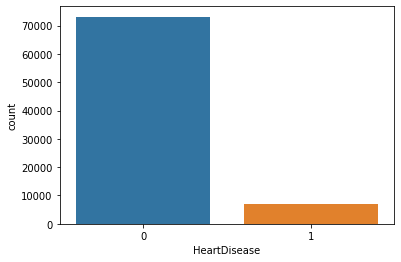

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(x=y_train);

In [95]:
make_pipe_xgb = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    XGBClassifier(n_estimators=200
                  , random_state=42
                  , n_jobs=-1
                  , max_depth=7
                  , learning_rate=0.1
                 )
)

make_pipe_xgb.fit(X_train, y_train);


In [96]:
print('f1 :',f1_score(y_test, make_pipe_xgb.predict(X_test)))
print(classification_report(y_test, make_pipe_xgb.predict(X_test)))
print('accuracy : ',accuracy_score(y_test, make_pipe_xgb.predict(X_test)))

f1 : 0.17251184834123223
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     18287
           1       0.46      0.11      0.17      1713

    accuracy                           0.91     20000
   macro avg       0.69      0.55      0.56     20000
weighted avg       0.88      0.91      0.89     20000

accuracy :  0.9127


In [97]:
make_pipe_logistic = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    LogisticRegression(solver='liblinear',random_state=42)

)

make_pipe_logistic .fit(X_train, y_train);


In [98]:
print('f1 :',f1_score(y_test, make_pipe_logistic.predict(X_test)))
print(classification_report(y_test, make_pipe_logistic.predict(X_test)))
print('accuracy : ',accuracy_score(y_test, make_pipe_logistic.predict(X_test)))

f1 : 0.15818091942659415
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     18287
           1       0.52      0.09      0.16      1713

    accuracy                           0.91     20000
   macro avg       0.72      0.54      0.56     20000
weighted avg       0.89      0.91      0.89     20000

accuracy :  0.91485


In [99]:
make_pipe_dt = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    DecisionTreeClassifier(random_state=42)
)

make_pipe_dt.fit(X_train, y_train);


In [100]:
print('f1 :',f1_score(y_test, make_pipe_dt.predict(X_test)))
print(classification_report(y_test, make_pipe_dt.predict(X_test)))
print('accuracy : ',accuracy_score(y_test, make_pipe_dt.predict(X_test)))

f1 : 0.23408395885460107
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     18287
           1       0.22      0.25      0.23      1713

    accuracy                           0.86     20000
   macro avg       0.58      0.58      0.58     20000
weighted avg       0.87      0.86      0.87     20000

accuracy :  0.86225


In [101]:
!pip install eli5

In [102]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.pipeline import Pipeline

In [103]:
pipe_lg = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder(), SimpleImputer(strategy='median'))),
    ('lg', LogisticRegression(solver='liblinear',random_state=42)),
])

pipe_xgb= Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder(), SimpleImputer(strategy='median'))),
    ('xg', XGBClassifier(n_estimators=200, random_state=42, n_jobs=-1, max_depth=7, learning_rate=0.1)) ,
])

pipe_dt = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder(), SimpleImputer(strategy='median'))),
    ('dt', DecisionTreeClassifier(random_state=42)),
])



pipe_lg.fit(X_train, y_train)
pipe_xgb.fit(X_train, y_train)
pipe_dt.fit(X_train, y_train)

permuter_dt = PermutationImportance(
    pipe_dt.named_steps['dt'],
    scoring='accuracy',
    n_iter=5,
    random_state=42
)
permuter_xgb = PermutationImportance(
    pipe_xgb.named_steps['xg'],
    scoring='accuracy',
    n_iter=5,
    random_state=42
)
permuter_lg = PermutationImportance(
    pipe_lg.named_steps['lg'],
    scoring='accuracy',
    n_iter=5,
    random_state=42
)

X_test_transformed = pipe_lg.named_steps['preprocessing'].transform(X_test)

permuter_dt.fit(X_test_transformed, y_test);
permuter_xgb.fit(X_test_transformed, y_test);
permuter_lg.fit(X_test_transformed, y_test);

feature_names = X_test.columns.tolist()


In [104]:
eli5.show_weights(
    permuter_dt, 
    top=None,
    feature_names=feature_names 
)

Weight,Feature
0.0087 ± 0.0029,AgeCategory
0.0066 ± 0.0019,GenHealth
0.0044 ± 0.0009,Stroke
0.0044 ± 0.0023,PhysicalHealth
0.0038 ± 0.0019,Sex
0.0035 ± 0.0011,Diabetic
0.0033 ± 0.0015,DiffWalking
0.0026 ± 0.0008,SkinCancer
0.0010 ± 0.0017,Asthma
0.0009 ± 0.0020,SleepTime


In [105]:
eli5.show_weights(
    permuter_xgb, 
    top=None,
    feature_names=feature_names 
)

Weight,Feature
0.0010 ± 0.0008,Stroke
0.0006 ± 0.0006,Sex
0.0003 ± 0.0010,PhysicalHealth
0.0002 ± 0.0012,Race
0.0001 ± 0.0012,GenHealth
-0.0000 ± 0.0005,Asthma
-0.0001 ± 0.0002,AlcoholDrinking
-0.0005 ± 0.0008,Smoking
-0.0005 ± 0.0004,KidneyDisease
-0.0005 ± 0.0009,MentalHealth


In [106]:
eli5.show_weights(
    permuter_lg, 
    top=None,
    feature_names=feature_names 
)

Weight,Feature
0.0020 ± 0.0005,Stroke
0.0010 ± 0.0007,Sex
0.0003 ± 0.0004,SleepTime
0.0002 ± 0.0002,MentalHealth
0.0001 ± 0.0004,GenHealth
0.0000 ± 0.0001,AgeCategory
0.0000 ± 0.0002,Asthma
-0.0000 ± 0.0004,AlcoholDrinking
-0.0000 ± 0.0004,Race
-0.0001 ± 0.0003,Diabetic


In [ ]:
#!pip install pdpbox

In [107]:
from pdpbox.pdp import pdp_isolate, pdp_plot

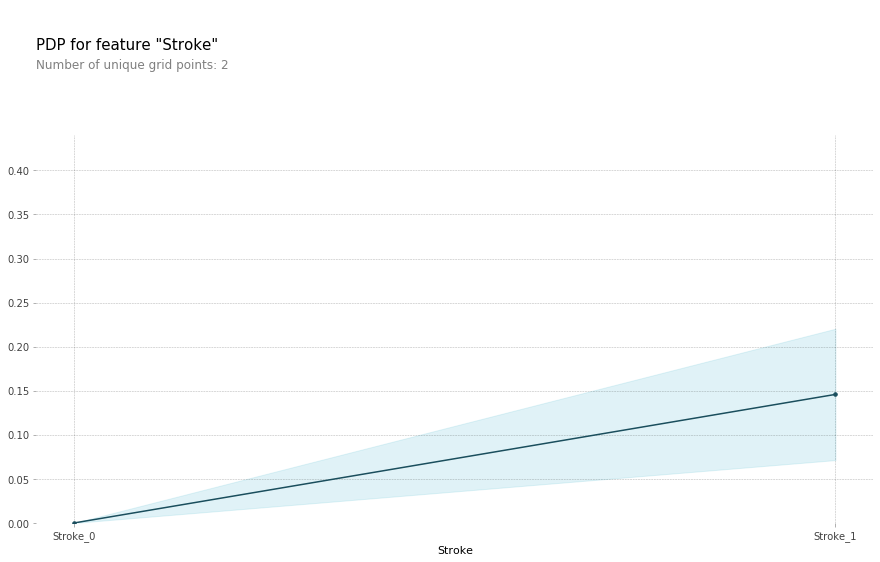

In [113]:
feature = 'Stroke'
isolated = pdp_isolate(
    model=make_pipe_logistic, 
    dataset=X_test, 
    model_features=X_test.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

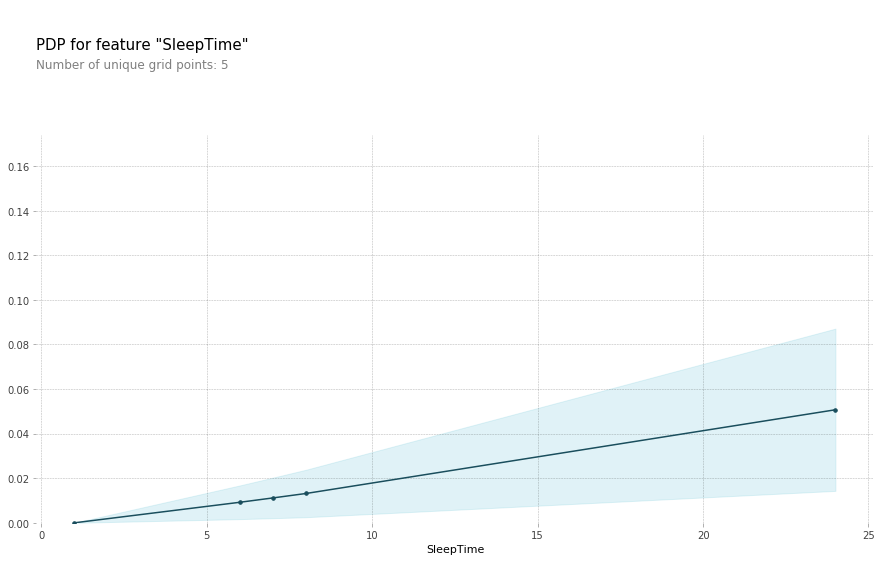

In [108]:
feature = 'SleepTime'
isolated = pdp_isolate(
    model=make_pipe_logistic, 
    dataset=X_test, 
    model_features=X_test.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

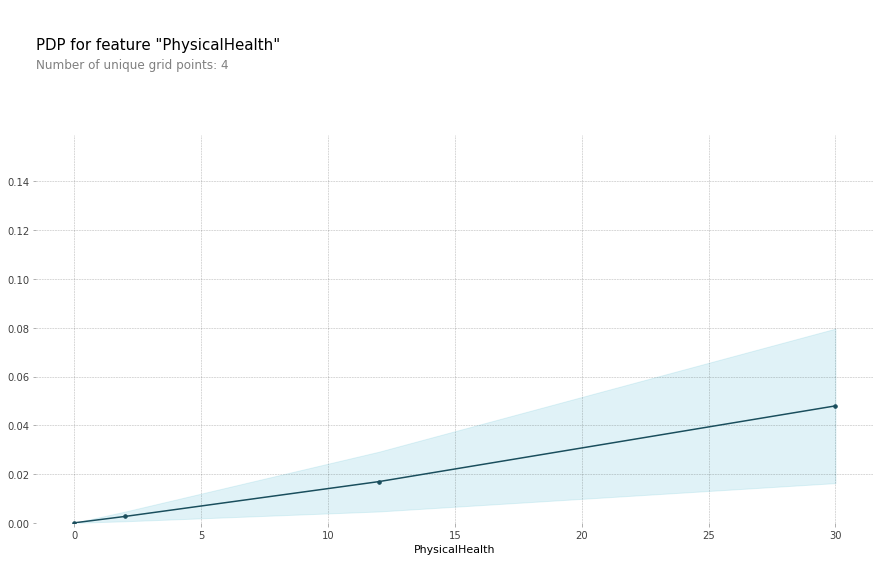

In [109]:
feature = 'PhysicalHealth'
isolated = pdp_isolate(
    model=make_pipe_logistic, 
    dataset=X_test, 
    model_features=X_test.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

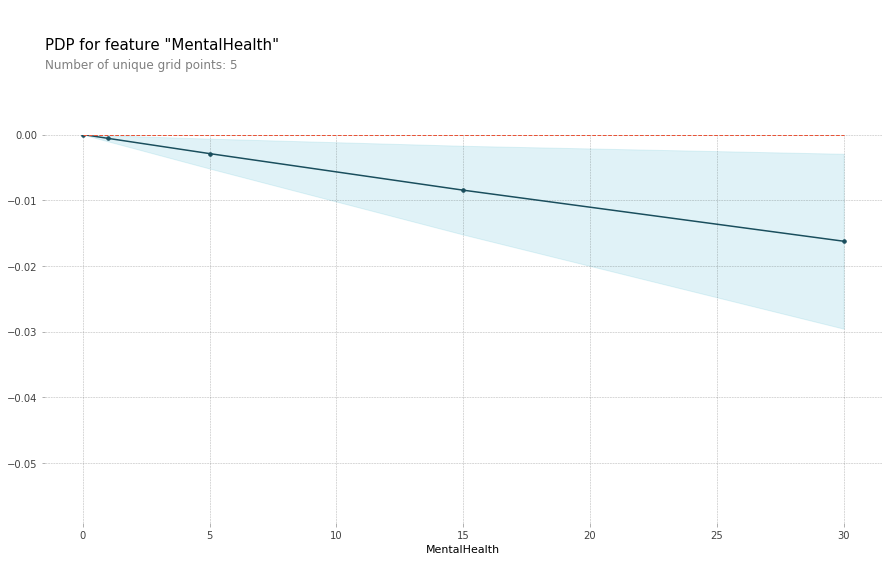

In [116]:
feature = 'MentalHealth'
isolated = pdp_isolate(
    model=make_pipe_logistic, 
    dataset=X_test, 
    model_features=X_test.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

In [119]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

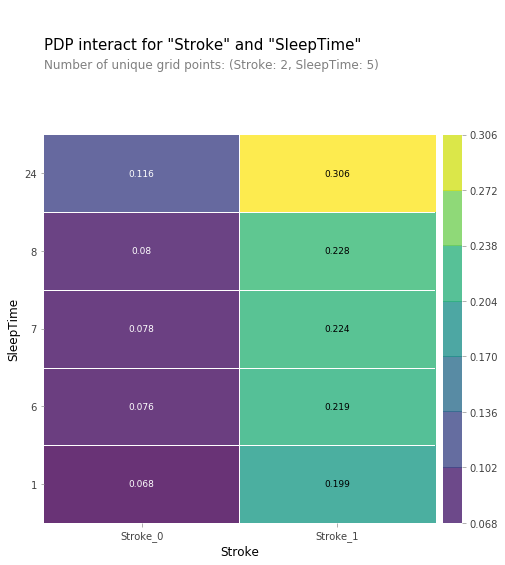

In [122]:
features = ['Stroke', 'SleepTime']

interaction = pdp_interact(
    model=make_pipe_logistic, 
    dataset=X_test, 
    model_features=X_test.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);